<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #5: TF-IDF
`Fecha de entrega: Marzo 25, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Punto 1: Pre-Procesamiento

- `[9 pts]` Leer el archivo `bob_esponja.csv` usando `pandas`
- `[9 pts]` Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [2]:
cd ..

/home/eacardenase/Documents/Especializacion en Analitica Estrategica de Datos/2nd semester/Natural Language Processing


In [3]:
# Leer archivo
bob_esponja = pd.read_csv("bob_esponja.csv")
bob_esponja

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


In [4]:
descripcion = bob_esponja["Descripción"]

In [5]:
texto = [palabra.lower() for palabra in descripcion]

In [6]:
# Eliminamos numeros y caracteres especiales
texto_limpio = []

for palabra in texto:
    palabra = re.sub(r"[\W\d]", " ", palabra)
    texto_limpio.append(palabra.strip())

In [7]:
texto = []

for palabra in texto_limpio:
    palabra = palabra.split()
    texto.append(palabra)

In [8]:
# Creamos una funcion para convertir una lista en un string
def listToString(lista):
    string = " "
    return string.join(lista)

In [9]:
# Extraemos las palabras vacias cada lista dentro de texto, y luego
# convertimos nuevamente esa lista en un string

pre_procesado = []
for lista in texto:
    lista = [word for word in lista if word not in stopwords_sp]
    lista = [spanishStemmer.stem(word) for word in lista]
    lista = listToString(lista)    
    pre_procesado.append(lista)

In [10]:
pre_procesado[0]

'bob esponj esponj mar form rectangul color amarill clar contorn verd oliv clar episodi anterior ancho cerc part superior vuelv delg haci abaj simil trapeci embarg episodi recient form cuadr regul bob esponj por color verd oliv clar hoyuel tres pec cad mejill boc grand dos dient delanter prominent nariz larg liger curv grand ojos azul clar ademas color ojos parec ser maner unic ton azul pacif cerule crayol complement fond azul ocean ademas tres pestañ excepcional anchas expuest afemin cad ojo vec primer plan particul demostr numer pestañ similar human destac mejor don cangrej instructor ve respir dificult prim plan aunqu rar vez ve seri cabell amarill clar va man color piel ve licenci conduc episodi esponj pod vol embarg episodi vide entren crustace cascarud cambi simpl mechon cabell negr general usa camis blanc corbat roj escarlat zapat cuer negr cordon blanc calcetin blanc ray azul roj pantalon rectangular marron cinturon negr mientr trabaj crustace cascarud usa sombrer alto blanc pe

In [13]:
texto_procesado = pd.DataFrame(pre_procesado, columns=["Procesado"])

In [15]:
personajes_df = bob_esponja.merge(texto_procesado, left_index=True, right_index=True)
personajes_df

,Personaje,Descripción,Procesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...",sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...",perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,gary caracol personaj principal bob esponj que...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

In [34]:
# tfidf_matrix
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df["Procesado"].values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index = personajes_df["Personaje"]

tfidf_matrix.T.round(3)

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.049,0.00,0.000,0.000,0.045,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.00,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.05,0.060,0.108,0.070,0.0,0.000,0.0,0.000,0.000
vol,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.195,0.00,0.000,0.139,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.172,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de los personajes
- `[2 pts]` ¿Cuáles son los personajes más parecidos?
- `[2 pts]` ¿Cuáles son los personajes más diferentes?

In [71]:
# dist_cos
dis_cos = cosine_distances(tfidf_matrix.values)

dis_cos = pd.DataFrame(dis_cos.round(3), columns = tfidf_matrix.index, index = tfidf_matrix.index)
dis_cos

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Personaje,,,,,,,,,,
Bob Esponja Pantalones Cuadrados,0.000,0.826,0.919,0.839,0.869,0.873,0.939,0.886,0.858,0.924
Patricio Estrella,0.826,0.000,0.791,0.842,0.832,0.967,0.931,0.892,0.953,0.895
Calamardo Tentáculos,0.919,0.791,0.000,0.920,0.831,0.918,0.950,0.967,0.968,0.852
Arenita Mejillas,0.839,0.842,0.920,0.000,0.908,0.968,0.949,0.962,0.972,0.901
Eugenio H. Cangrejo,0.869,0.832,0.831,0.908,0.000,0.688,0.892,0.797,0.896,0.921
Sheldon J. Plankton,0.873,0.967,0.918,0.968,0.688,0.000,0.795,0.923,0.987,0.969
Karen Plankton,0.939,0.931,0.950,0.949,0.892,0.795,0.000,0.966,0.985,0.966
Perlita Cangrejo,0.886,0.892,0.967,0.962,0.797,0.923,0.966,0.000,0.874,0.970
Sra. Puff,0.858,0.953,0.968,0.972,0.896,0.987,0.985,0.874,0.000,0.964


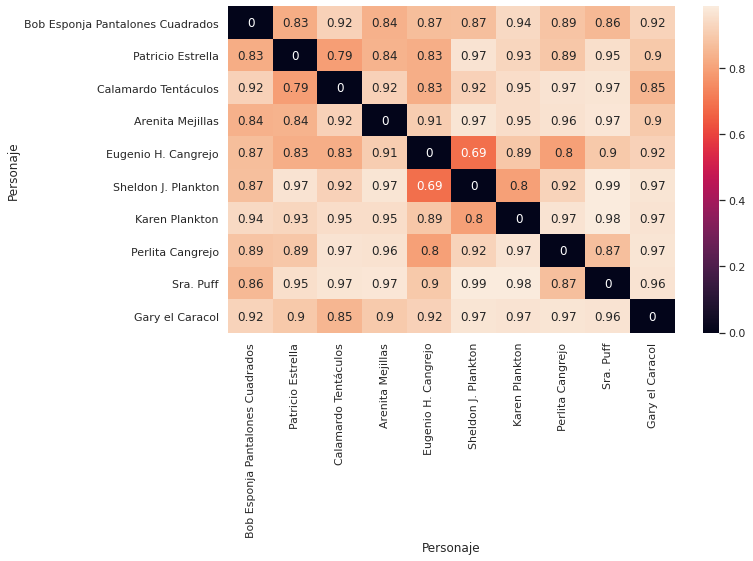

In [81]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

personajes = dis_cos.columns
plt.figure(figsize=(10, 6))
x = sns.heatmap(dis_cos, annot=True)

# ¿Cuáles son los personajes más parecidos?

Segun la distancia del conseno, podemos concluir que Don Cangrejo y Plankton son los personajes mas parecidos.

# ¿Cuáles son los personajes más diferentes?

Segun el mapa de calor, podemos evidenciar que Plankton y la Sra. Puff son los personajes mas diferentes.